# Import Packages

In [1]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Flatten, Dense,MaxPool2D
import numpy as np
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from sklearn.utils import class_weight

In [2]:
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

# Import Data

In [3]:
nbatch = 256
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(128,128),
                                                 batch_size =nbatch,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(128,128),
                                            batch_size =nbatch,
                                            class_mode = 'binary')

Found 242341 images belonging to 2 classes.
Found 40258 images belonging to 2 classes.


# Data Split

Text(0.5, 0, 'Class')

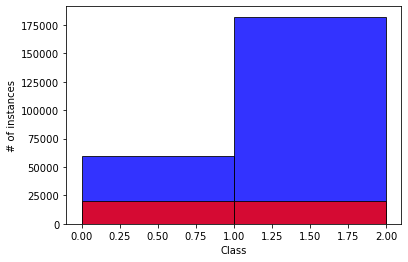

In [4]:
h1 = plt.hist(training_set.classes, bins=range(0,3), alpha=0.8, color='blue', edgecolor='black')
h2 = plt.hist(test_set.classes,  bins=range(0,3), alpha=0.8, color='red', edgecolor='black')
plt.ylabel('# of instances')
plt.xlabel('Class')

In [5]:
class_weights = {0:3,1:1}

# Visualise Data

(256, 128, 128, 3) (256,)


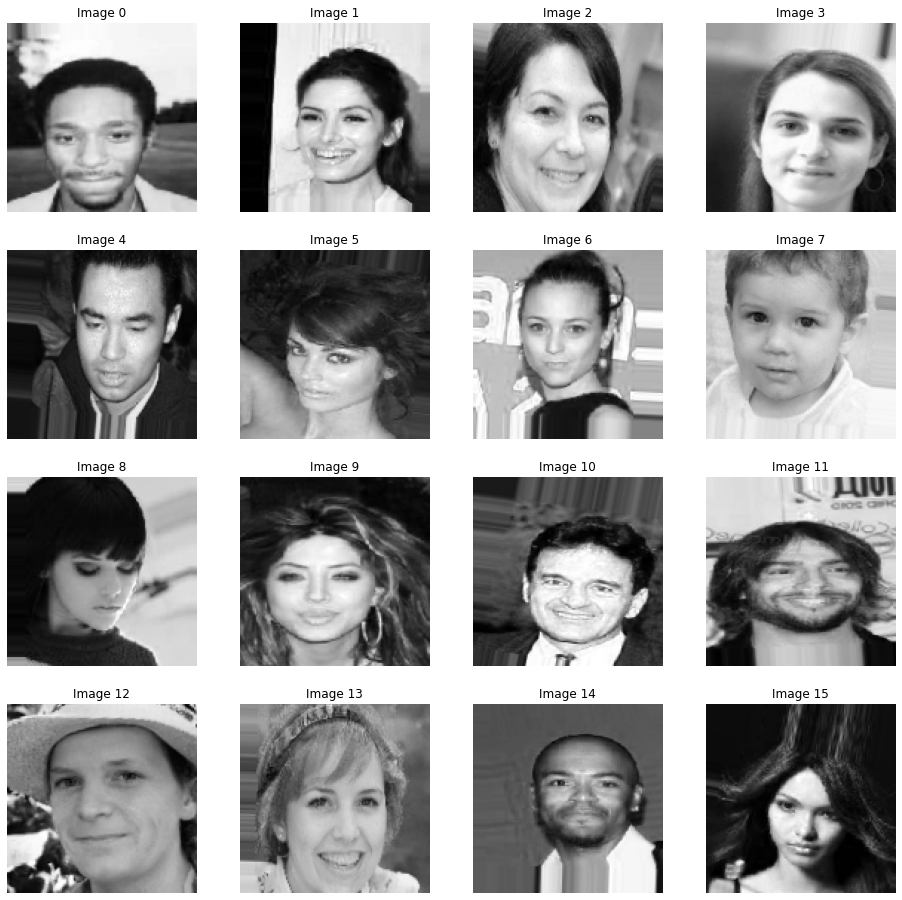

In [6]:
for X, y in training_set:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.axis('off')
        plt.title('Image ' + str(i))
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

# CNN Model
9 Layers

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(activation="relu",
                units=256))

model.add(Dense(activation="sigmoid",
                units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [8]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [9]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model_checkpoint.hdf5', monitor='val_loss', save_best_only=True, mode ='max'),
]

# CNN - 7 Layers

In [10]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))

model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))

model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(activation="relu",
                units=256))

model2.add(Dense(activation="sigmoid",
                units=1))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               14745856  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [11]:
model2.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [12]:
callbacks_list2 = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model2_checkpoint.hdf5', monitor='val_loss', save_best_only=True, mode ='max'),
]

# CNN - 5 Layer

In [13]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))

model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(activation="relu",
                units=256))

model1.add(Dense(activation="sigmoid",
                units=1))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               32514304  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 32,515,457
Trainable params: 32,515,457
Non-trainable params: 0
_________________________________________________________________


In [14]:
model1.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [15]:
callbacks_list1 = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model1_checkpoint.hdf5', monitor='val_loss', save_best_only=True, mode ='max'),
]

# Train Model

In [22]:
history = model.fit(
        training_set,
        steps_per_epoch=160,
        epochs=16,
        class_weight=class_weights,
        validation_data=test_set,
        validation_steps=32,
        callbacks = callbacks_list
    )

Epoch 1/16
160/160 [==============================] - 3453s 22s/step - loss: 0.3026 - accuracy: 0.9183 - val_loss: 0.1151 - val_accuracy: 0.9551
Epoch 2/16
160/160 [==============================] - 3033s 19s/step - loss: 0.1874 - accuracy: 0.9517 - val_loss: 0.5212 - val_accuracy: 0.8298
Epoch 3/16
160/160 [==============================] - 3195s 20s/step - loss: 0.1373 - accuracy: 0.9657 - val_loss: 0.0751 - val_accuracy: 0.9752
Epoch 4/16
160/160 [==============================] - 2342s 15s/step - loss: 0.1167 - accuracy: 0.9715 - val_loss: 0.2979 - val_accuracy: 0.8914
Epoch 5/16
160/160 [==============================] - 2307s 14s/step - loss: 0.0861 - accuracy: 0.9785 - val_loss: 0.0711 - val_accuracy: 0.9764
Epoch 6/16
160/160 [==============================] - 9692s 61s/step - loss: 0.0755 - accuracy: 0.9814 - val_loss: 0.2817 - val_accuracy: 0.9219
Epoch 7/16
160/160 [==============================] - 2451s 15s/step - loss: 0.0625 - accuracy: 0.9847 - val_loss: 0.0871 - val_ac

In [25]:
# architecture and weights to HDF5
model.save('models/CNNmodel_16_3.h5')

# architecture to JSON, weights to HDF5
model.save_weights('models/weights_16_3.h5')
with open('models/architecture.json', 'w') as f:
    f.write(model.to_json())
    
print("done")

done


In [26]:
history2 = model2.fit(
        training_set,
        steps_per_epoch=160,
        epochs=16,
        class_weight=class_weights,
        validation_data=test_set,
        validation_steps=32,
        callbacks = callbacks_list2
    )

Epoch 1/16
160/160 [==============================] - 1861s 12s/step - loss: 0.6821 - accuracy: 0.7975 - val_loss: 0.1900 - val_accuracy: 0.9283
Epoch 2/16
160/160 [==============================] - 1874s 12s/step - loss: 0.3339 - accuracy: 0.9077 - val_loss: 0.2350 - val_accuracy: 0.9025
Epoch 3/16
160/160 [==============================] - 1882s 12s/step - loss: 0.2502 - accuracy: 0.9329 - val_loss: 0.2350 - val_accuracy: 0.9119
Epoch 4/16
160/160 [==============================] - 1897s 12s/step - loss: 0.1708 - accuracy: 0.9562 - val_loss: 0.0885 - val_accuracy: 0.9679
Epoch 5/16
160/160 [==============================] - 1821s 11s/step - loss: 0.1524 - accuracy: 0.9616 - val_loss: 0.1909 - val_accuracy: 0.9241
Epoch 6/16
160/160 [==============================] - 1830s 11s/step - loss: 0.1026 - accuracy: 0.9739 - val_loss: 0.0683 - val_accuracy: 0.9739
Epoch 7/16
160/160 [==============================] - 1868s 12s/step - loss: 0.0929 - accuracy: 0.9766 - val_loss: 0.0863 - val_ac

In [27]:
# architecture and weights to HDF5
model2.save('models/CNNmodel_16_2.h5')

# architecture to JSON, weights to HDF5
model2.save_weights('models/weights_16_2.h5')
with open('models/architecture.json', 'w') as f:
    f.write(model2.to_json())
    
print("done")

done


Text(0.5, 0, '# of epochs')

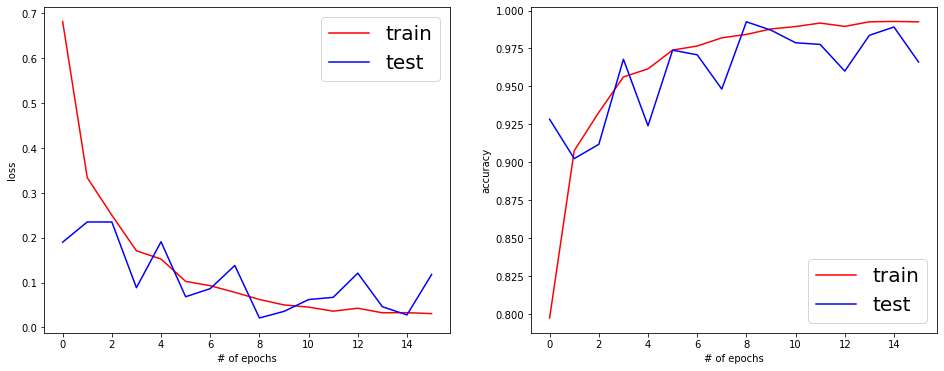

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history2.history['loss'])
plt.plot(range(nepochs), history2.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history2.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history2.history['accuracy'],     'r-', label='train')
plt.plot(range(nepochs), history2.history['val_accuracy'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

In [16]:
history1 = model1.fit(
        training_set,
        steps_per_epoch=160,
        epochs=16,
        class_weight=class_weights,
        validation_data=test_set,
        validation_steps=32,
        callbacks = callbacks_list1
    )

Epoch 1/16
160/160 [==============================] - 2108s 13s/step - loss: 1.8954 - accuracy: 0.7715 - val_loss: 0.2608 - val_accuracy: 0.8915
Epoch 2/16
160/160 [==============================] - 2359s 15s/step - loss: 0.3643 - accuracy: 0.9012 - val_loss: 0.1570 - val_accuracy: 0.9412
Epoch 3/16
160/160 [==============================] - 2241s 14s/step - loss: 0.3062 - accuracy: 0.9173 - val_loss: 0.1899 - val_accuracy: 0.9275
Epoch 4/16
160/160 [==============================] - 2180s 14s/step - loss: 0.2683 - accuracy: 0.9270 - val_loss: 0.0902 - val_accuracy: 0.9685
Epoch 5/16
160/160 [==============================] - 2197s 14s/step - loss: 0.2275 - accuracy: 0.9408 - val_loss: 0.1479 - val_accuracy: 0.9463
Epoch 6/16
160/160 [==============================] - 2285s 14s/step - loss: 0.1983 - accuracy: 0.9480 - val_loss: 0.2435 - val_accuracy: 0.9221
Epoch 7/16
160/160 [==============================] - 2273s 14s/step - loss: 0.1790 - accuracy: 0.9537 - val_loss: 0.5441 - val_ac

In [17]:
# architecture and weights to HDF5
model1.save('models/CNNmodel_16_1.h5')

# architecture to JSON, weights to HDF5
model1.save_weights('models/weights_16_1.h5')
with open('models/architecture.json', 'w') as f:
    f.write(model1.to_json())
    
print("done")

done


Text(0.5, 0, '# of epochs')

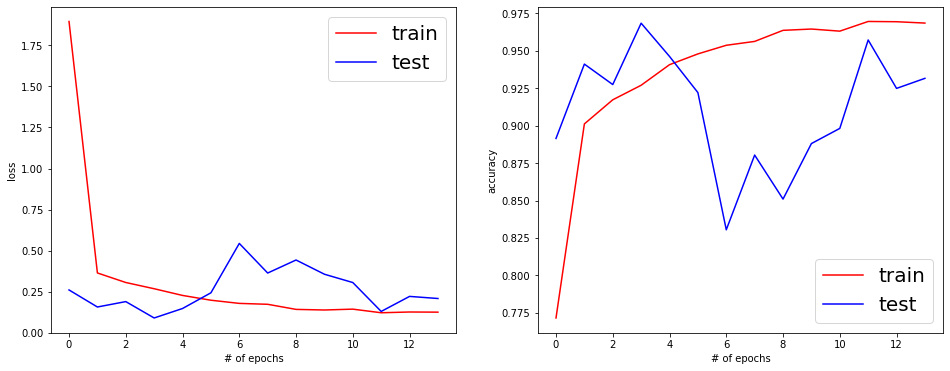

In [18]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history1.history['loss'])
plt.plot(range(nepochs), history1.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history1.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history1.history['accuracy'],     'r-', label='train')
plt.plot(range(nepochs), history1.history['val_accuracy'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

In [19]:
training_set.class_indices

{'fakeFaces': 0, 'img_align_celeba': 1}

# Plot Model Outcome

Text(0.5, 0, '# of epochs')

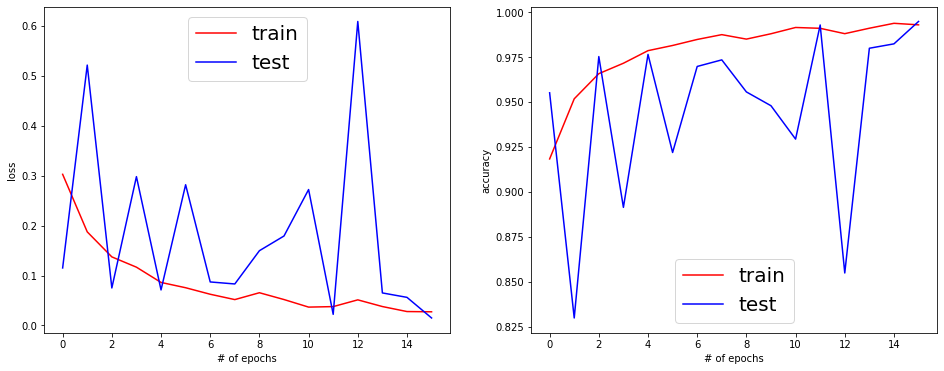

In [24]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['accuracy'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_accuracy'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

In [19]:
def ImagePrediction(loc):
    test_image = image.load_img(loc, target_size = (128,128))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis =0)
    result = model.predict(test_image)
    if result[0][0] == 1:
        predictions = 'Real'
    else:
        predictions = 'Fake'
    print('Prediction: ',predictions)

# Save Model

In [ ]:
# architecture and weights to HDF5
model.save('models/CNNmodel_16_3.h5')

# architecture to JSON, weights to HDF5
model.save_weights('models/weights_16.h5')
with open('models/architecture.json', 'w') as f:
    f.write(model.to_json())
    
print("done")